In [87]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [88]:
train = pd.read_csv("/notebooks/OriginalDataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("/notebooks/OriginalDataset/UNSW_NB15_testing-set.csv")

In [89]:
df = pd.concat([train, test]).drop(['id', 'label'], axis=1)
df = df[df['attack_cat'] != 'Normal']

x = df.drop('attack_cat', axis=1)
x['service'] = x['service'].replace('-', 'none')
y = df['attack_cat']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

df.shape

(164673, 43)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25, random_state=42)

x_c = x_train.copy()

for col in ['proto', 'service', 'state']:
    le = LabelEncoder()
    x_c[col] = le.fit_transform(x_c[col])

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
n_runs = 100
importances = np.zeros(x_c.shape[1])

In [66]:
for _ in range(n_runs):
    rf.fit(x_c, y_train)
    importances += rf.feature_importances_

In [67]:
importances /= n_runs
feature_importances = dict(zip(x_c.columns, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f'{feature}: {importance}')

TypeError: unsupported operand type(s) for /=: 'tuple' and 'int'

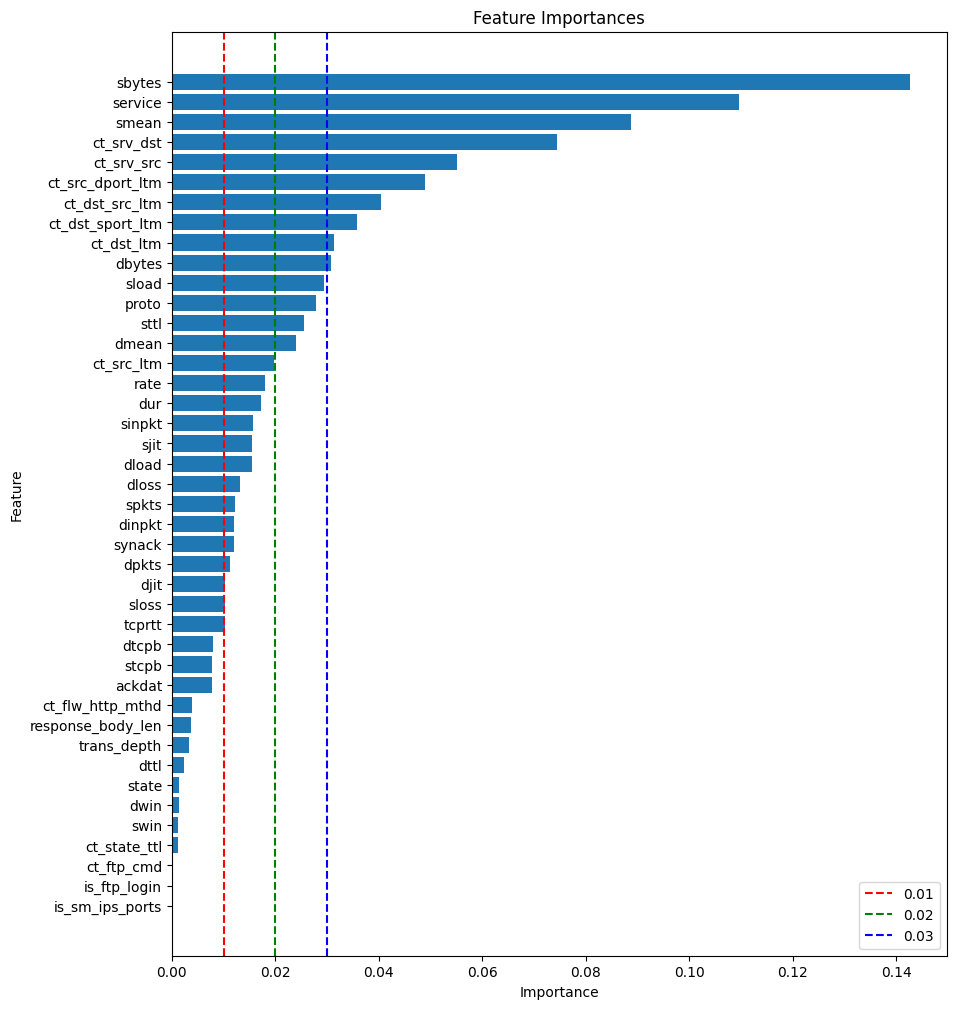

In [68]:
import matplotlib.pyplot as plt

features, importances = zip(*sorted_features)

plt.figure(figsize=(10, 12))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 

plt.axvline(x=0.01, color='red', linestyle='--', label='0.01')
plt.axvline(x=0.02, color='green', linestyle='--', label='0.02')
plt.axvline(x=0.03, color='blue', linestyle='--', label='0.03')

plt.legend()

plt.show()

In [102]:
importance_threshold = 0.01
top_features = [feature for feature, importance in sorted_features if importance >= importance_threshold]

x_train_top = x_train[top_features]
x_test_top = x_test[top_features]

df_train_top = pd.concat([x_train_top.reset_index(drop=True),
                    pd.Series(y_train, name='attack_cat').reset_index(drop=True)],
                    axis=1)

df_test_top = pd.concat([x_test_top.reset_index(drop=True),
                    pd.Series(y_test, name='attack_cat').reset_index(drop=True)],
                    axis=1)

df_train_top.to_csv('/notebooks/ProcessedDataset/top001_train.csv', index=False)
df_test_top.to_csv('/notebooks/ProcessedDataset/top001_test.csv', index=False)

display(x_train_top)

,sbytes,service,smean,ct_srv_dst,ct_srv_src,ct_src_dport_ltm,ct_dst_src_ltm,ct_dst_sport_ltm,ct_dst_ltm,dbytes,...,sjit,dload,dloss,spkts,dinpkt,synack,dpkts,djit,sloss,tcprtt
78648,756,none,76,2,2,1,2,1,1,354,...,7248.584917,1930.386230,1,10,173.418422,0.070787,8,283.992469,2,0.138911
87488,564,none,56,1,4,1,1,1,1,354,...,11170.355480,1742.427002,1,10,184.165719,0.134134,8,266.409719,2,0.210842
122935,848,http,85,1,1,1,1,1,1,1332,...,6706.842525,9269.021484,2,10,100.559109,0.090082,10,196.158500,2,0.136950
50389,200,none,100,6,6,1,7,1,1,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000
133626,114,dns,57,28,28,11,28,11,11,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130547,114,dns,57,22,22,6,22,6,6,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000
113792,756,none,76,1,4,1,1,1,1,268,...,6370.782649,1628.633423,1,10,186.605594,0.167272,6,305.049656,2,0.236164
142600,200,none,100,2,2,1,2,1,1,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000
157535,114,dns,57,32,32,14,32,14,14,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000


In [103]:
display(x_test_top)

,sbytes,service,smean,ct_srv_dst,ct_srv_src,ct_src_dport_ltm,ct_dst_src_ltm,ct_dst_sport_ltm,ct_dst_ltm,dbytes,...,sjit,dload,dloss,spkts,dinpkt,synack,dpkts,djit,sloss,tcprtt
69635,9244,none,462,9,4,1,4,1,4,9026,...,3208.565150,61989.890630,6,20,66.290132,0.097689,16,3983.543310,7,0.250338
132149,114,dns,57,28,28,15,28,15,15,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000
85936,430,http,43,2,2,4,4,4,4,20054,...,70.834508,293464.937500,4,10,22.075895,0.000000,20,1933.424232,0,0.000000
119640,200,none,100,5,5,2,5,2,2,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000
110832,180,none,90,7,7,7,7,7,7,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76444,180,none,90,10,10,10,10,10,11,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000
114361,16815,smtp,525,1,1,1,1,1,1,1722,...,2760.015948,9137.310547,8,32,73.410266,0.036858,20,86.396406,13,0.087237
148470,114,dns,57,37,37,37,37,11,37,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000
171208,114,dns,57,27,27,19,27,11,19,0,...,0.000000,0.000000,0,2,0.000000,0.000000,0,0.000000,0,0.000000


In [104]:
categorical_cols = ['proto', 'service', 'state']
binary_cols = ['is_sm_ips_ports', 'is_ftp_login']

exclude_cols = categorical_cols + binary_cols
numerical_cols = [col for col in x_train_top.columns if col not in exclude_cols]
scaler = MinMaxScaler(feature_range=(-1, 1))

x_train_top[numerical_cols] = scaler.fit_transform(x_train_top[numerical_cols])
x_test_top[numerical_cols] = scaler.transform(x_test_top[numerical_cols])

cols_to_encode = list(set(top_features) & set(categorical_cols))

x_train_top_encoded = pd.get_dummies(x_train_top, columns=cols_to_encode, prefix=cols_to_encode)
x_test_top_encoded = pd.get_dummies(x_test_top, columns=cols_to_encode, prefix=cols_to_encode)

display(x_train_top_encoded)

/tmp/ipykernel_36/1872046599.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_top[numerical_cols] = scaler.fit_transform(x_train_top[numerical_cols])
/tmp/ipykernel_36/1872046599.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_top[numerical_cols] = scaler.transform(x_test_top[numerical_cols])


,sbytes,smean,ct_srv_dst,ct_srv_src,ct_src_dport_ltm,ct_dst_src_ltm,ct_dst_sport_ltm,ct_dst_ltm,dbytes,sload,...,service_ftp-data,service_http,service_irc,service_none,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
78648,-0.999893,-0.929730,-0.967213,-0.967742,-1.000000,-0.96875,-1.000000,-1.000000,-0.999952,-0.999998,...,0,0,0,1,0,0,0,0,0,0
87488,-0.999921,-0.956757,-1.000000,-0.903226,-1.000000,-1.00000,-1.000000,-1.000000,-0.999952,-0.999999,...,0,0,0,1,0,0,0,0,0,0
122935,-0.999880,-0.917568,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-0.999818,-0.999998,...,0,1,0,0,0,0,0,0,0,0
50389,-0.999974,-0.897297,-0.836066,-0.838710,-1.000000,-0.81250,-1.000000,-1.000000,-1.000000,-0.928571,...,0,0,0,1,0,0,0,0,0,0
133626,-0.999987,-0.955405,-0.114754,-0.129032,-0.655172,-0.15625,-0.444444,-0.655172,-1.000000,-0.959286,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130547,-0.999987,-0.955405,-0.311475,-0.322581,-0.827586,-0.34375,-0.722222,-0.827586,-1.000000,-0.972857,...,0,0,0,0,0,0,0,0,0,0
113792,-0.999893,-0.929730,-1.000000,-0.903226,-1.000000,-1.00000,-1.000000,-1.000000,-0.999963,-0.999998,...,0,0,0,1,0,0,0,0,0,0
142600,-0.999974,-0.897297,-0.967213,-0.967742,-1.000000,-0.96875,-1.000000,-1.000000,-1.000000,-0.904762,...,0,0,0,1,0,0,0,0,0,0
157535,-0.999987,-0.955405,0.016393,0.000000,-0.551724,-0.03125,-0.277778,-0.551724,-1.000000,-0.972857,...,0,0,0,0,0,0,0,0,0,0


In [105]:
display(x_test_top_encoded)

,sbytes,smean,ct_srv_dst,ct_srv_src,ct_src_dport_ltm,ct_dst_src_ltm,ct_dst_sport_ltm,ct_dst_ltm,dbytes,sload,...,service_ftp-data,service_http,service_irc,service_none,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
69635,-0.998652,-0.408108,-0.737705,-0.903226,-1.000000,-0.90625,-1.000000,-0.896552,-0.998768,-0.999977,...,0,0,0,1,0,0,0,0,0,0
132149,-0.999987,-0.955405,-0.114754,-0.129032,-0.517241,-0.15625,-0.222222,-0.517241,-1.000000,-0.967429,...,0,0,0,0,0,0,0,0,0,0
85936,-0.999941,-0.974324,-0.967213,-0.967742,-0.896552,-0.90625,-0.833333,-0.896552,-0.997263,-0.999998,...,0,1,0,0,0,0,0,0,0,0
119640,-0.999974,-0.897297,-0.868852,-0.870968,-0.965517,-0.87500,-0.944444,-0.965517,-1.000000,-0.942857,...,0,0,0,1,0,0,0,0,0,0
110832,-0.999977,-0.910811,-0.803279,-0.806452,-0.793103,-0.81250,-0.666667,-0.793103,-1.000000,-0.935714,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76444,-0.999977,-0.910811,-0.704918,-0.709677,-0.689655,-0.71875,-0.500000,-0.655172,-1.000000,-0.948571,...,0,0,0,1,0,0,0,0,0,0
114361,-0.997545,-0.322973,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-0.999765,-0.999968,...,0,0,0,0,0,0,1,0,0,0
148470,-0.999987,-0.955405,0.180328,0.161290,0.241379,0.12500,-0.444444,0.241379,-1.000000,-0.979643,...,0,0,0,0,0,0,0,0,0,0
171208,-0.999987,-0.955405,-0.147541,-0.161290,-0.379310,-0.18750,-0.444444,-0.379310,-1.000000,-0.918571,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df_train_top_encoded = pd.concat([x_train_top_encoded.reset_index(drop=True),
                            pd.Series(y_train, name='attack_cat').reset_index(drop=True)],
                           axis=1)

df_train_top_encoded.to_csv(f'/notebooks/FinalDataset/top001_train_encoded.csv', index=False)


df_test_top_encoded = pd.concat([x_test_top_encoded.reset_index(drop=True),
                            pd.Series(y_test, name='attack_cat').reset_index(drop=True)],
                           axis=1)

df_test_top_encoded.to_csv(f'/notebooks/FinalDataset/top001_test_encoded.csv', index=False)